# **Tugas  Decision Tree**
 Nama : Roy Suwanda

 NIM : 210411100046

**Tugas yang diberikan :**

**Buat pohon keputusan dengan scikit learn**
1. Bentuk pohon keputusan dari data iris dataset training dan testing 0.8/0.2
2. Berikan penjelasan proses secara detail
3. Bandingkan hasilnya dengan k-nn dan naive bayes
4. hasilnya di upload di repository masig masing

## **1. Konsep dan Penjelasan Decision Tree**
Decision tree adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko. Konsepnya adalah dengan cara menyajikan algoritma dengan pernyataan bersyarat, yang meliputi cabang untuk mewakili langkah-langkah pengambilan keputusan yang dapat mengarah pada hasil yang menguntungkan. 




## **2. Implementasi Decision Tree**


Panggil Module yang akan digunakan untuk pengolahan data

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

Ambil dan baca data iris

In [ ]:
url = "https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv"
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

Bagi dataset menjadi set training dan test dengan perbandingan 0.8/0.2

Memakai module train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
d3 = DecisionTreeClassifier()
d3.fit(X_train, y_train)

DecisionTreeClassifier()

##Membuat grafik Pohon Keputusan

Dibagian ini menggunakan module graphiz untuk membuat grafik/menggambarkan pohon keputusan yang merender data Iris

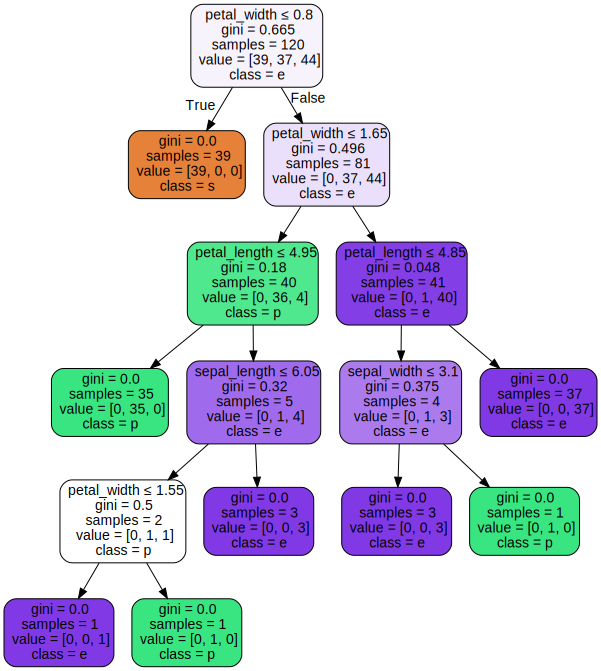

In [ ]:
import graphviz 
dot_data =export_graphviz(d3, out_file=None, feature_names=df.columns[:-1], class_names=df.columns[-1],  filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
graph

## Prediksi

In [ ]:
y_predic = d3.predict(X_test)
y_predic

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [ ]:
data_predic = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_predic, columns=["Predict"]).reset_index(drop=True)], axis=1)
data_predic

,species,Predict
0,setosa,setosa
1,versicolor,versicolor
2,versicolor,versicolor
3,setosa,setosa
4,virginica,virginica
5,versicolor,versicolor
6,virginica,virginica
7,setosa,setosa
8,setosa,setosa
9,virginica,virginica


In [ ]:
correct = data_predic.loc[data_predic["species"] == data_predic["Predict"]]

## Hasil Pengolahan Data Dengan Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
print(f'acuraty = {"{:,.2f}".format(accuracy_score(y_test, y_predic)*100)}%')
print(f'dari data prediksi {correct.shape[0]} / {data_predic.shape[0]} * 100% = {"{:,.2f}".format((correct.shape[0]) / (data_predic.shape[0]) * 100)}%' )

acuraty = 96.67%
dari data prediksi 29 / 30 * 100% = 96.67%


## **3. Implementasi K-NN**


In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset_url="https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv"
data=pd.read_csv(dataset_url)

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris=load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(iris.data.shape)

(150, 4)


In [ ]:
#create a dataframe with all training data except the target column
X = data.drop(columns=["Species"])
#check that the target variable has been removed
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
#separate target values
y = data["Species"].values
#view target values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 11)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.66666667 1.         1.         1.         0.7       ]
cv_scores mean:0.8733333333333333


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 2}

## Hasil Pengolahan Data Dengan KNN

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8799999999999999

## **4. Implementasi Naive Bayes**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')

In [ ]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Hasil Pengolahan Data Dengan Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


## **5. Perbandingan**
*   Pengolahan dengan metode decision tree menghasilkan tingkat akurasi sebesar **96.67%**
dari data prediksi  **29 / 30 * 100% = 96.67%**
*   Pengolahan dengan metode KNN menghasilkan tingkat akurasi sebesar **0.8799**

*   Pengolahan dengan metode Naive Bayes menghasilkan accuracy_Naive Bayes:  **accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000**




